<a href="https://colab.research.google.com/github/narutaku0914/KIKAGAKU/blob/master/kikagaku_ML4no_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師なし学習

### 主成分分析(Principal Component Analysis)

次元削減 (Dimensionality reduction) の手法の一つ<br>
ex) 4次元(列数が4つ)のデータを2次元など低次元に落とし込む

特徴：　<br>
可視化したいときに用いる手法

高次元（多次元）のデータを低次元化する手法

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# データの読み込み(アヤメ)
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

# データの確認
pd.DataFrame(x, columns=feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# モデルの定義
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)  # 4 → 2に削減

In [ ]:
# 学習
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# 分散の確認
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

.fit() メソッドで分散を算出<br>
今回は n_components=2 → 第二主成分まで出力

transformで写像<br>
写像: 元データを主成分軸上へ写すこと<br>
第二主成分は第一主成分と直交関係 
→ この軸で失われた情報を補う

In [ ]:
# 主成分分析の適用
x_transformed = pca.transform(x)

# 適用後の確認
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分']).head()

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


寄与率 (Proportion of the variance): それぞれの列が保持する元のデータの情報の割合<br>
寄与率は fit() メソッド後の explained_variance_ratio_ 属性からそれぞれの寄与率を確認可能

In [ ]:
print('第一主成分の寄与率:{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率:{}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率:0.9246187232017271
第二主成分の寄与率:0.05306648311706782


97%で保持

主成分分析を適用した後にはこの寄与率を確認し、元のデータをどの程度再現できているのかを確認することが重要

In [ ]:
np.unique(t)

array([0, 1, 2])

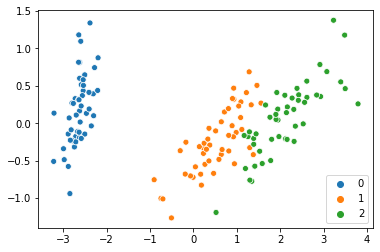

In [ ]:
# 次元削減後のデータを可視化
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))

次元削減により可視化できた


標準化の適用

**★主成分分析では必ず変数の標準化を行う**

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# モデルの定義
pca = PCA(n_components=2, random_state=0)

# pcaの適用
x_std_transformed = pca.fit_transform(x_scaled)

# 適用後のデータの確認
pd.DataFrame(x_std_transformed, columns=['第一主成分', '第二主成分']).head(10)

,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [ ]:
# 寄与率
print('第一主成分の寄与率:{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率:{}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率:0.7296244541329987
第二主成分の寄与率:0.2285076178670178


標準化によって第二の寄与率UP<br>
しかし損失もUP

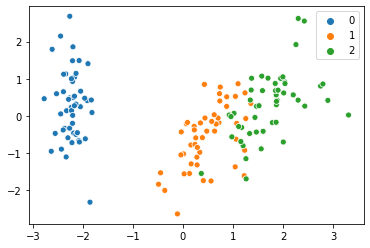

In [ ]:
# 可視化
sns.scatterplot(x_std_transformed[:, 0], x_std_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))

Text(0.5, 1.0, 'After')

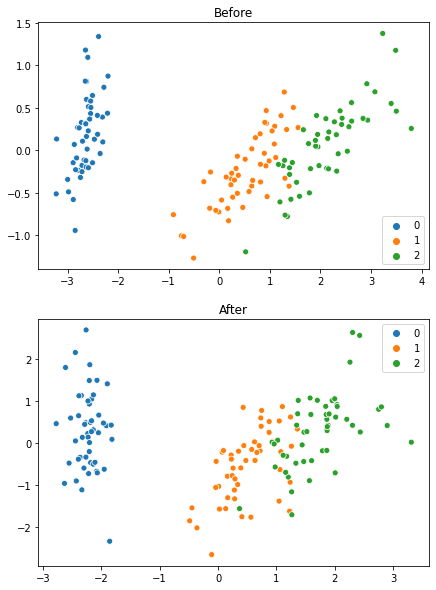

In [ ]:
fig = plt.figure(figsize=(7,10))

# 標準化適用前
ax1 = fig.add_subplot(2,1,1)
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))
ax1.set_title('Before')

# 適用後
ax2 = fig.add_subplot(2,1,2)
sns.scatterplot(x_std_transformed[:, 0], x_std_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))
ax2.set_title('After')

主成分分析では平均を 0 にすることが必要な前処理!

### k-平均法 (k-means)

クラスタリングと呼ばれる手法に当たり、データを複数のクラスター（グループ）に分けて大まかな特徴を捉える際に使用

1. 人間側がクラスター（グループ）の数を決める

2. ランダムに振られた点（重心）から近いものをクラスターとする

3. 紐づいたクラスターとの距離を元に重心を移動させる

3 つを重心が動かなくなるまで繰り返し

In [ ]:
# コンビニの購買データを例に
from google.colab import files
uploaded = files.upload()

Saving convinience_store.csv to convinience_store (1).csv


In [ ]:
df = pd.read_csv('convinience_store.csv')
df.head(3)

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570


In [ ]:
x = df.drop('No', axis=1).values
x[:3] 

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

In [ ]:
# 実装
from sklearn.cluster import KMeans

# 定義
kmeans = KMeans(n_clusters=3, random_state=0)

# 学習
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# クラスター中心座標の確認
kmeans.cluster_centers_

array([[ 5043.5483871 ,  3486.41935484,  7017.74193548,  2206.        ,
         2512.90322581,  3509.12903226],
       [28681.25      ,  5637.66666667,  1298.75      ,  1271.        ,
         1770.875     ,   716.95833333],
       [17266.66666667,  2730.93333333, 10721.66666667,   590.86666667,
         3447.33333333,  9851.2       ]])

In [ ]:
kmeans.cluster_centers_.shape

(3, 6)

In [ ]:
# 適用
cluster = kmeans.predict(x)
cluster

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

予測値が 0 ~ 2 となっていて、ハイパーパラメータで設定したクラスター数と同じことが確認できる<br> but どのようにクラスタリングされているか判断が難しい → この情報を元のデータフレームに追加する

In [ ]:
# データフレームの作成
df_cluster = df.copy() # データフレームのコピー
df_cluster['cluster'] = cluster

df_cluster.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


教師あり学習と異なり明確な答えが存在しないため、その予測結果がどのようなもので、どのように活用するかに関しては人間側が考慮する必要がある！

クラスター結果の考察

In [ ]:
# 空のデータフレーム作成
df_results = pd.DataFrame()
df_results

""


In [ ]:
# クラスター0の平均値
df_cluster[df_cluster['cluster'] == 0].mean().tolist()

[37.806451612903224,
 5043.548387096775,
 3486.4193548387098,
 7017.741935483871,
 2206.0,
 2512.9032258064517,
 3509.1290322580644,
 0.0]

In [ ]:
# 各クラスターの平均値を追加
df_results['cluster 0 '] = df_cluster[df_cluster['cluster'] == 0].mean().tolist()
df_results['cluster 1 '] = df_cluster[df_cluster['cluster'] == 1].mean().tolist()
df_results['cluster 2 '] = df_cluster[df_cluster['cluster'] == 2].mean().tolist()

df_results

,cluster 0,cluster 1,cluster 2
0,37.806452,46.250000,13.533333
1,5043.548387,28681.250000,17266.666667
2,3486.419355,5637.666667,2730.933333
3,7017.741935,1298.750000,10721.666667
4,2206.000000,1271.000000,590.866667
5,2512.903226,1770.875000,3447.333333
6,3509.129032,716.958333,9851.200000
7,0.000000,1.000000,2.000000


In [ ]:
# Indexに列名を追加
df_results = df_results.set_index(df_cluster.columns)

# 転置
df_results = df_results.drop(['No', 'cluster']).T

df_results

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,5043.548387,3486.419355,7017.741935,2206.000000,2512.903226,3509.129032
cluster 1,28681.250000,5637.666667,1298.750000,1271.000000,1770.875000,716.958333
cluster 2,17266.666667,2730.933333,10721.666667,590.866667,3447.333333,9851.200000


明確な答えが無く、人間側が予測結果からデータの加工を行い、そこから活用方法の考察を行う必要がある